# Static solutions

A notebook to plot the analytic 'static' solutions (or at least late time solutions) found in Spitkovsky et al. 2002 and compare them against static solutions given by numerical code.

## Localised heating in a rotating atmosphere without friction

In Spitkovsky et al. 2002, it's given that for a constant delta function heating $Q(x,y) = Q_0\delta(x)$, the fluid follows a growing vortex sheet solution:
$$
h(x,t) = \frac{Q_0 t}{2 a_R} e^{-|x|/a_R},
$$
$$
v_x(x,t) = \text{sign}(x) \frac{Q_0}{2H_0}e^{-|x|/a_R},
$$
$$
v_y(x,t) = - \text{sign}(x) \frac{Q_0 t f}{2H_0}e^{-|x|/a_R},
$$
where $H_0$ is the scale height, $a_R$ the Rossby adjustment radius and $f = 2\Omega\cos\theta$ the local Coriolis parameter at latitude $\theta$ for a body with angular frequency $\Omega$.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [60]:
Q0 = 0.2
aR = 1.0
f = 0.2
H0 = 1.0

nx = 100
nt = 20

xs = np.linspace(-5.0, 5.0, nx, endpoint=True)
ts = np.linspace(0.0, 10, nt+1, endpoint=True)
qs = np.zeros((nt+1, nx, 3))

In [61]:
for i in range(nt+1):
    qs[i,:,0] = (Q0 * ts[i] / (2.0 * aR)) * np.exp(-np.abs(xs) / aR)
    qs[i,:,1] = np.sign(xs) * (Q0 / (2.0 * H0)) * np.exp(-np.abs(xs) / aR)
    qs[i,:,2] = - np.sign(xs) * (Q0 * ts[i] * f / (2.0 * H0)) * np.exp(-np.abs(xs) / aR)

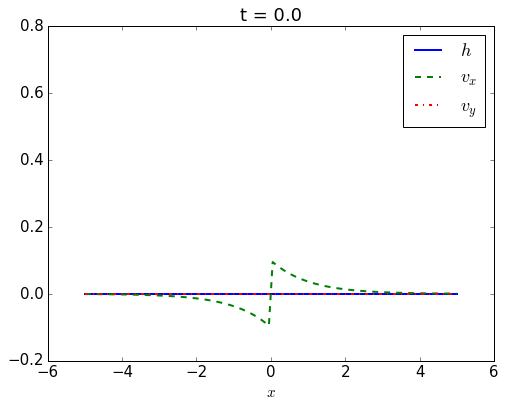

In [68]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plt.rc("font", size=15)

def animate(i):
    ax.clear()
    ax.plot(xs, qs[i,:,0], xs, qs[i,:,1], '--', xs, qs[i,:,2], '-.', lw=2)
    title = 't = ' + str(ts[i])
    ax.set_title(title)
    ax.set_xlabel(r'$x$')
    ax.legend([r'$h$', r'$v_x$', r'$v_y$'])#, loc='center left', bbox_to_anchor=(1, 0.5))
    ax
    ax.set_ylim([-0.2, 0.8])    

anim = animation.FuncAnimation(fig, animate, frames=nt+1, interval=150)

In [69]:
HTML(anim.to_html5_video())